### Incorporating Point Pattern Analysis in Inglewood - SoFi Stadium
NELSON GUEVARA + LUIS CRUZ 

In this notebook, we will be incorporating a point pattern analysis while using data from the LA County Assessor Portal. 
We will analyze structres built in 2 different time periods. Before the Development of Sofi - years 2000 to 2010, and Post Sofi Development Announcement 2011-2020.

# Point Pattern Analysis (Prior to SoFi Development News)

## HELLO: SEABORN (Non-interactive static images) 

In [131]:
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

In [132]:
# Next - I will import LA City Assessors Parcel Data from the open portal system. 
# For this first part I am requesting data for the city of Inglewood that was registered by the assessors office in the roll year of 2010. I 
# want to look in to buildings built between 2000 and 2010. 

In [133]:
# connect to the data portal
client = Socrata("data.lacounty.gov", None)

results = client.get("9trm-uz8i",
                    limit=50000,
                    where="taxratearea_city='INGLEWOOD' AND rollyear=2010 AND yearbuilt between 2000 and 2010")

df10 = pd.DataFrame.from_records(results)



# Note: We have called this data frame df10 because later we repeat
# this exercise with a 20 value, for the latter portion of the years.



In [134]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   situszip                   576 non-null    object
 1   taxratearea_city           576 non-null    object
 2   ain                        576 non-null    object
 3   rollyear                   576 non-null    object
 4   taxratearea                576 non-null    object
 5   assessorid                 576 non-null    object
 6   propertylocation           567 non-null    object
 7   usetype                    576 non-null    object
 8   usecode                    576 non-null    object
 9   usecodedescchar1           576 non-null    object
 10  usecodedescchar2           576 non-null    object
 11  usecodedescchar3           576 non-null    object
 12  usecodedescchar4           576 non-null    object
 13  totbuildingdatalines       576 non-null    object
 14  yearbuilt 

In [135]:
# Ok, so apparently there are 510 structures registered with the assessors office that were built in the city of Inglewood between 2000 and 
# 2010. 

In [136]:
df10.sample()

situszip taxratearea_city         ain rollyear taxratearea  \
185  90305-1882        INGLEWOOD  4025021046     2010       04596   

       assessorid                       propertylocation usetype usecode  \
185  4025-021-046  3639 W MEDICI LN  INGLEWOOD CA  90305     SFR    0100   

    usecodedescchar1  ... situsfraction situsdirection situsstreet situsunit  \
185      Residential  ...                            W   MEDICI LN             

        situscity situszip5           rowid   center_lat     center_lon  \
185  INGLEWOOD CA     90305  20104025021046  33.95330449  -118.33391546   

                                            location_1  
185  {'latitude': '33.95330449', 'longitude': '-118...  

[1 rows x 51 columns]

In [137]:
df10.head(5)

situszip taxratearea_city         ain rollyear taxratearea    assessorid  \
0  90302-1140        INGLEWOOD  4002015038     2010       04569  4002-015-038   
1  90302-1224        INGLEWOOD  4002020007     2010       04569  4002-020-007   
2  90305-1021        INGLEWOOD  4009021013     2010       04569  4009-021-013   
3  90305-1120        INGLEWOOD  4009026002     2010       04569  4009-026-002   
4  90305-1805        INGLEWOOD  4010032006     2010       04569  4010-032-006   

                          propertylocation usetype usecode usecodedescchar1  \
0  1300 CENTINELA AVE  INGLEWOOD CA  90302     C/I    1100       Commercial   
1       114 W 64TH PL  INGLEWOOD CA  90302     R-I    0500      Residential   
2      3029 W 78TH ST  INGLEWOOD CA  90305     SFR    0100      Residential   
3      2406 W 78TH ST  INGLEWOOD CA  90305     SFR    0100      Residential   
4      2611 W 84TH PL  INGLEWOOD CA  90305     SFR    0100      Residential   

   ... situsfraction situsdirection    situsstreet situsunit     situscity  \
0  ...                               CENTINELA AVE            INGLEWOOD CA   
1  ...                            W        64TH PL            INGLEWOOD CA   
2  ...                            W        78TH ST            INGLEWOOD CA   
3  ...                            W        78TH ST            INGLEWOOD CA   
4  ...                            W        84TH PL            INGLEWOOD CA   

  situszip5           rowid   center_lat     center_lon  \
0     90302  20104002015038  33.97689024  -118.36174626   
1     90302  20104002020007  33.97982101  -118.35882967   
2     90305  20104009021013  33.96933255  -118.32629165   
3     90305  20104009026002  33.96881495  -118.32026095   
4     90305  20104010032006  33.96181235  -118.32148076   

                                          location_1  
0  {'latitude': '33.97689024', 'longitude': '-118...  
1  {'latitude': '33.97982101', 'longitude': '-118...  
2  {'latitude': '33.96933255', 'longitude': '-118...  
3  {'latitude': '33.96881495', 'longitude': '-118...  
4  {'latitude': '33.96181235', 'longitude': '-118...  

[5 rows x 51 columns]

In [138]:
df10.tail(5)

situszip taxratearea_city         ain rollyear taxratearea  \
571  90301-2003        INGLEWOOD  4126002015     2010       13265   
572  90301-2003        INGLEWOOD  4126002019     2010       13265   
573  90301-2003        INGLEWOOD  4126002017     2010       13265   
574  90301-2003        INGLEWOOD  4126002013     2010       13265   
575  90301-2003        INGLEWOOD  4126002012     2010       13265   

       assessorid                         propertylocation usetype usecode  \
571  4126-002-015  8707 AVIATION BLVD  INGLEWOOD CA  90301     C/I    3300   
572  4126-002-019  8715 AVIATION BLVD  INGLEWOOD CA  90301     C/I    3300   
573  4126-002-017  8711 AVIATION BLVD  INGLEWOOD CA  90301     C/I    3300   
574  4126-002-013  8703 AVIATION BLVD  INGLEWOOD CA  90301     C/I    3300   
575  4126-002-012  8701 AVIATION BLVD  INGLEWOOD CA  90301     C/I    3300   

    usecodedescchar1  ... situsfraction situsdirection    situsstreet  \
571       Industrial  ...                               AVIATION BLVD   
572       Industrial  ...                               AVIATION BLVD   
573       Industrial  ...                               AVIATION BLVD   
574       Industrial  ...                               AVIATION BLVD   
575       Industrial  ...                               AVIATION BLVD   

    situsunit     situscity situszip5           rowid   center_lat  \
571            INGLEWOOD CA     90301  20104126002015  33.95769688   
572            INGLEWOOD CA     90301  20104126002019  33.95769688   
573            INGLEWOOD CA     90301  20104126002017  33.95769688   
574            INGLEWOOD CA     90301  20104126002013  33.95769688   
575            INGLEWOOD CA     90301  20104126002012  33.95769688   

        center_lon                                         location_1  
571  -118.37797129  {'latitude': '33.95769688', 'longitude': '-118...  
572  -118.37797129  {'latitude': '33.95769688', 'longitude': '-118...  
573  -118.37797129  {'latitude': '33.95769688', 'longitude': '-118...  
574  -118.37797129  {'latitude': '33.95769688', 'longitude': '-118...  
575  -118.37797129  {'latitude': '33.95769688', 'longitude': '-118...  

[5 rows x 51 columns]

In [139]:
# Here I convert our pandas dataframe to geodataframe
gdf10 = gpd.GeoDataFrame(df10, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(df10.center_lon, df10.center_lat))

In [140]:
# We convert lat/lon values to floats
df10.center_lon = df10.center_lon.astype('float')
df10.center_lat = df10.center_lat.astype('float')
gdf10.rollyear = gdf10.rollyear.astype('int')

In [141]:
# We drop the unmapped rows
gdf10 = gdf10[gdf10.center_lon!=0]

In [142]:
# We filter columns to focus only on what we care for 

gdf10=gdf10[['taxratearea_city','usetype','usecodedescchar1','yearbuilt',
         'roll_totalvalue','center_lat','center_lon','geometry']]


In [143]:
# We rename columns for easier access 
gdf10.columns = ['city','use_type','use_desc','year_built','total_value',
                 'center_lat','center_lon','geometry']

In [144]:
gdf10.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   city         576 non-null    object  
 1   use_type     576 non-null    object  
 2   use_desc     576 non-null    object  
 3   year_built   576 non-null    object  
 4   total_value  576 non-null    object  
 5   center_lat   576 non-null    float64 
 6   center_lon   576 non-null    float64 
 7   geometry     576 non-null    geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 40.5+ KB


In [13]:
gdf10.sample()

city use_type     use_desc year_built total_value  center_lat  \
502  INGLEWOOD      SFR  Residential       2008      323000   33.956011   

     center_lon                     geometry  
502 -118.325079  POINT (-118.32508 33.95601)

In [14]:
# We project here to web mercator 
gdf10=gdf10.to_crs('EPSG:3857')

In [15]:
# We drop the rows with null values 
gdf10 = gdf10.dropna()

In [16]:
# We drop properties with a total value of 0
gdf10 = gdf10[gdf10.total_value!=0]

In [17]:
gdf10.shape

(576, 8)

In [18]:
gdf10.sample(20)

city use_type     use_desc year_built total_value  center_lat  \
254  INGLEWOOD      SFR  Residential       2006      415000   33.953069   
177  INGLEWOOD      SFR  Residential       2005      415000   33.953546   
438  INGLEWOOD      SFR  Residential       2005      455000   33.955338   
7    INGLEWOOD      SFR  Residential       2000      330000   33.969684   
445  INGLEWOOD      SFR  Residential       2006      455000   33.954141   
461  INGLEWOOD      SFR  Residential       2005      550000   33.952809   
330  INGLEWOOD      SFR  Residential       2006      455000   33.954529   
522  INGLEWOOD      SFR  Residential       2002      167000   33.942091   
94   INGLEWOOD      CND  Residential       2001      127000   33.953397   
403  INGLEWOOD      SFR  Residential       2005      455000   33.955338   
98   INGLEWOOD      C/I   Commercial       2004     4234768   33.945815   
270  INGLEWOOD      SFR  Residential       2006      146615   33.952813   
552  INGLEWOOD      SFR  Residential       2002      360000   33.925404   
91   INGLEWOOD      CND  Residential       2001      168000   33.953397   
133  INGLEWOOD      SFR  Residential       2006      415000   33.953661   
169  INGLEWOOD      SFR  Residential       2005      548000   33.954664   
376  INGLEWOOD      SFR  Residential       2006      415000   33.955436   
368  INGLEWOOD      SFR  Residential       2005      499000   33.953328   
392  INGLEWOOD      SFR  Residential       2005      455000   33.955730   
566  INGLEWOOD      C/I   Industrial       2005     1022695   33.957697   

     center_lon                           geometry  
254 -118.332875  POINT (-13172755.342 4022502.125)  
177 -118.332715  POINT (-13172737.541 4022566.150)  
438 -118.333491  POINT (-13172823.937 4022806.559)  
7   -118.333326  POINT (-13172805.645 4024731.999)  
445 -118.333694  POINT (-13172846.589 4022645.992)  
461 -118.332141  POINT (-13172673.700 4022467.223)  
330 -118.334470  POINT (-13172932.998 4022697.976)  
522 -118.325572  POINT (-13171942.408 4021028.863)  
94  -118.346498  POINT (-13174271.864 4022546.100)  
403 -118.333722  POINT (-13172849.631 4022806.538)  
98  -118.351998  POINT (-13174884.202 4021528.683)  
270 -118.335084  POINT (-13173001.276 4022467.784)  
552 -118.333384  POINT (-13172812.054 4018790.020)  
91  -118.346498  POINT (-13174271.864 4022546.100)  
133 -118.333719  POINT (-13172849.333 4022581.477)  
169 -118.331950  POINT (-13172652.440 4022716.068)  
376 -118.334966  POINT (-13172988.204 4022819.780)  
368 -118.332368  POINT (-13172698.927 4022536.843)  
392 -118.332653  POINT (-13172730.713 4022859.169)  
566 -118.377971  POINT (-13177775.485 4023123.164)

# HEAT MAPS

We begin plotting our data to see if anything comes up at first sight. 

<AxesSubplot:>

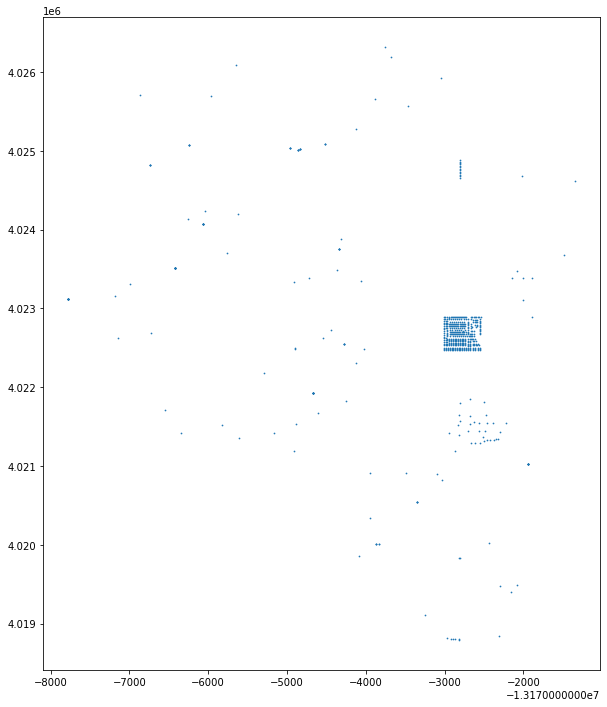

In [19]:
gdf10.plot(figsize=(12,12),
             markersize=0.5)

The resulting plot is showing us the data spatially 
organized for the city of Inglewood. We don't really know much yet, 
but its here! It's plotted. And well, would you look at that! 
That one section of mass produced buildings is there. Maybe we will be able to
understand it better now?

## Batch exploration

Through this mechanism - I can look at specific dimension of data points and figures. For examople, in the first command following this mark down cell I want to know how many values each type of Use Description are available within my data frame.

In [20]:
gdf10.use_desc.value_counts()

Residential      503
Commercial        56
Industrial        14
Institutional      2
Miscellaneous      1
Name: use_desc, dtype: int64

In [21]:
gdf10.use_type.value_counts()

SFR    419
CND     70
C/I     69
R-I     14
OTH      3
VAC      1
Name: use_type, dtype: int64

In [22]:
gdf10.year_built.value_counts()

2005    215
2006    207
2007     41
2000     34
2002     24
2004     21
2003     13
2001     11
2008      9
2009      1
Name: year_built, dtype: int64

In [23]:
gdf10.total_value.value_counts()

455000     133
415000     112
500000      28
548000      27
410000       8
          ... 
23707        1
801566       1
2997605      1
3139169      1
29960        1
Name: total_value, Length: 208, dtype: int64

In [24]:
# get the top 3 types of building use structures
top_3_uses = gdf10.use_desc.value_counts().head(3).index.tolist()
top_3_uses

['Residential', 'Commercial', 'Industrial']

In [25]:
#Slice of data for a single building type:



gdf10[gdf10.use_desc == 'Residential'].head()

city use_type     use_desc year_built total_value  center_lat  \
1  INGLEWOOD      R-I  Residential       2004     1602454   33.979821   
2  INGLEWOOD      SFR  Residential       2003      294445   33.969333   
3  INGLEWOOD      SFR  Residential       2002      419983   33.968815   
4  INGLEWOOD      SFR  Residential       2004      446000   33.961812   
6  INGLEWOOD      SFR  Residential       2000      303623   33.970243   

   center_lon                           geometry  
1 -118.358830  POINT (-13175644.650 4026092.803)  
2 -118.326292  POINT (-13172022.534 4024684.880)  
3 -118.320261  POINT (-13171351.199 4024615.404)  
4 -118.321481  POINT (-13171486.988 4023675.510)  
6 -118.333337  POINT (-13172806.763 4024807.112)

In [26]:
gdf10.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   city         576 non-null    object  
 1   use_type     576 non-null    object  
 2   use_desc     576 non-null    object  
 3   year_built   576 non-null    object  
 4   total_value  576 non-null    object  
 5   center_lat   576 non-null    float64 
 6   center_lon   576 non-null    float64 
 7   geometry     576 non-null    geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 40.5+ KB


In [27]:
gdf10=gdf10.to_crs('EPSG:3857')

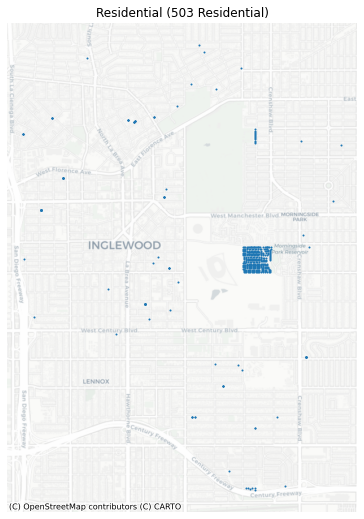

In [28]:
# use type variable
use_desc = 'Residential'

# map
ax = gdf10[gdf10.use_desc == use_desc].plot(figsize=(9,9), markersize=1)

# title (including count)
ax.set_title(use_desc + ' (' + str(gdf10[gdf10.use_desc == use_desc].shape[0]) + ' Residential)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:3857', # surprise! You can change the crs here!
                source=ctx.providers.CartoDB.Positron)

In [29]:
# create a function
def use_desc_by(use_desc='Residential'):
    
    # map
    ax = gdf10[gdf10.use_desc == use_desc].plot(figsize=(9,9), markersize=3)
    
    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title(use_desc + ' (' + str(gdf10[gdf10.use_desc == use_desc].shape[0]) + ' Records)')

    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:3857', # surprise! You can change the crs here!
                    source=ctx.providers.CartoDB.Positron)

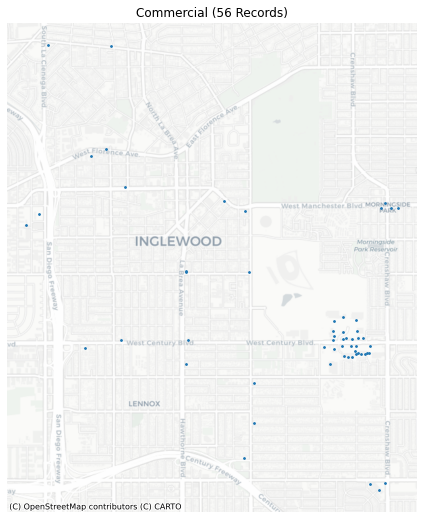

In [30]:
# call the function for a different building type
use_desc_by(use_desc = 'Commercial')

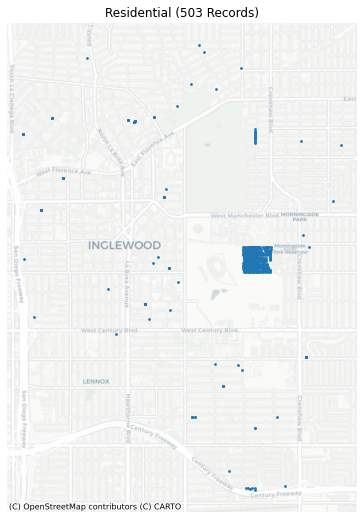

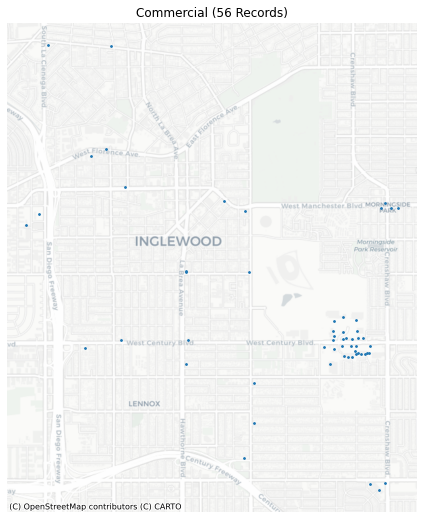

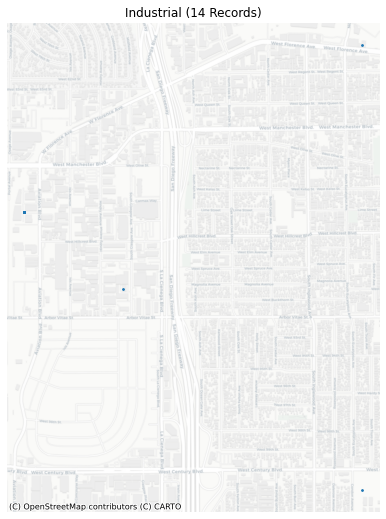

In [31]:
# loop through top 3 buildings uses
for use_desc in top_3_uses:
    use_desc_by(use_desc = use_desc)

# LETS PLAY WITH SEABORN

In [32]:
# seaborn needs an x and y column so let's extract it from the geometry field
gdf10['x'] = gdf10.geometry.x
gdf10['y'] = gdf10.geometry.y

In [33]:
gdf10.head()

city use_type     use_desc year_built total_value  center_lat  \
0  INGLEWOOD      C/I   Commercial       2007     2918934   33.976890   
1  INGLEWOOD      R-I  Residential       2004     1602454   33.979821   
2  INGLEWOOD      SFR  Residential       2003      294445   33.969333   
3  INGLEWOOD      SFR  Residential       2002      419983   33.968815   
4  INGLEWOOD      SFR  Residential       2004      446000   33.961812   

   center_lon                           geometry             x             y  
0 -118.361746  POINT (-13175969.323 4025699.372) -1.317597e+07  4.025699e+06  
1 -118.358830  POINT (-13175644.650 4026092.803) -1.317564e+07  4.026093e+06  
2 -118.326292  POINT (-13172022.534 4024684.880) -1.317202e+07  4.024685e+06  
3 -118.320261  POINT (-13171351.199 4024615.404) -1.317135e+07  4.024615e+06  
4 -118.321481  POINT (-13171486.988 4023675.510) -1.317149e+07  4.023676e+06

### Visualizing statistical relationships

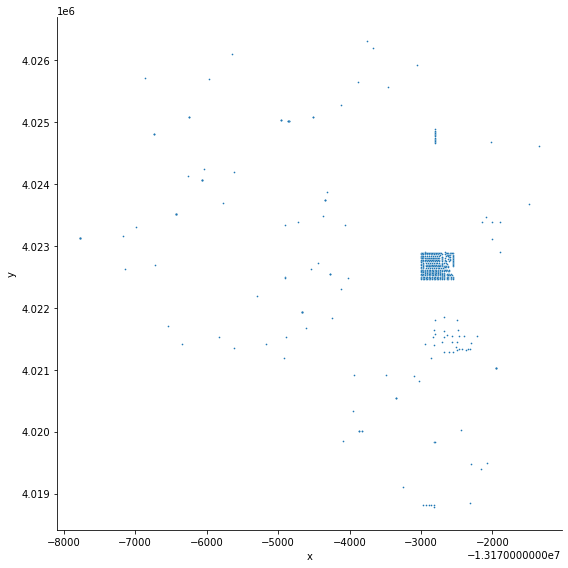

In [34]:
# scatterplot
sns.relplot(data=gdf10,
            x='x', 
            y='y',
            s=3, # size of point
            height=8 # size of plot
           )

# Seaborn Themes 

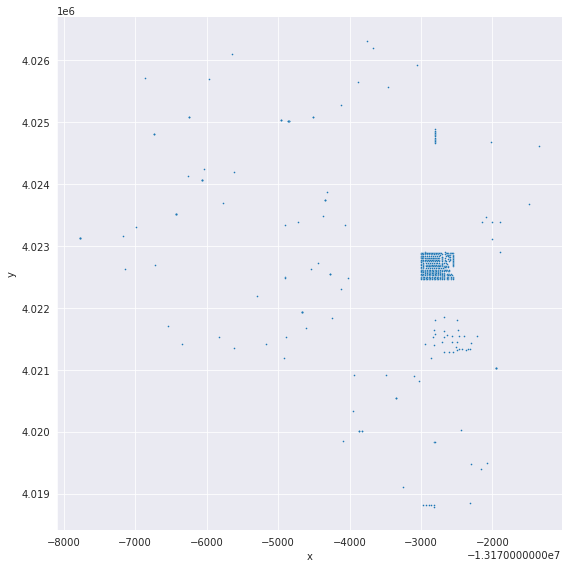

In [35]:
# seaborn comes with themes to make them prettier
sns.set_style('darkgrid')

# scatterplot 
sns.relplot(data=gdf10,
            x='x', 
            y='y',
            s=3,
            height=8)

In [36]:
# function
def sns_styles(style='darkgrid'):
    # seaborn comes with themes to make them prettier
    sns.set_style(style)

    # scatterplot 
    sns.relplot(data=gdf10,
                x='x', 
                y='y',
                s=3,
                height=8)

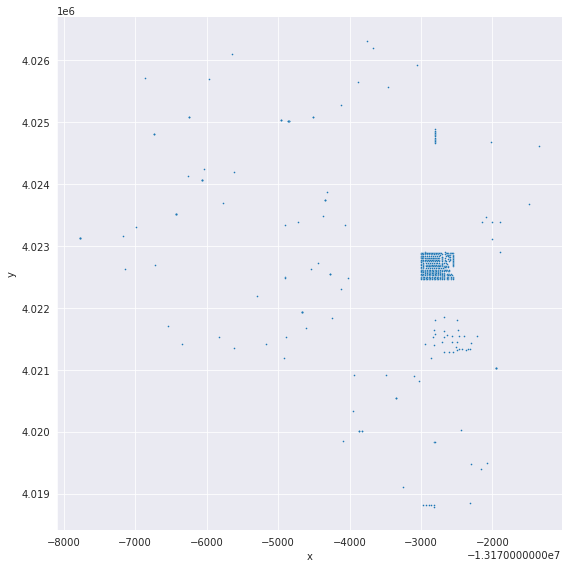

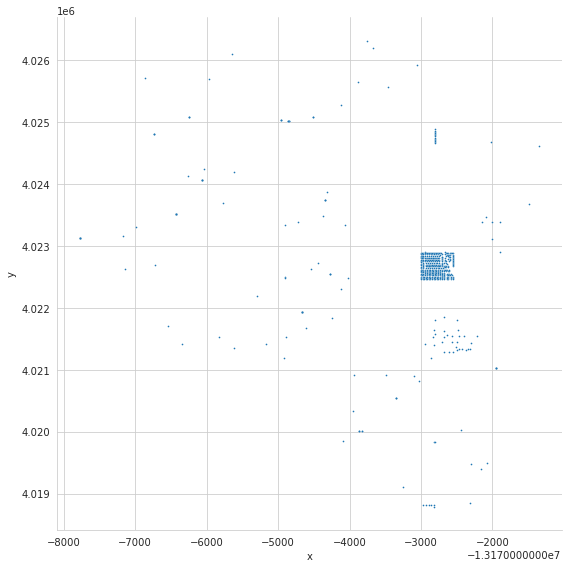

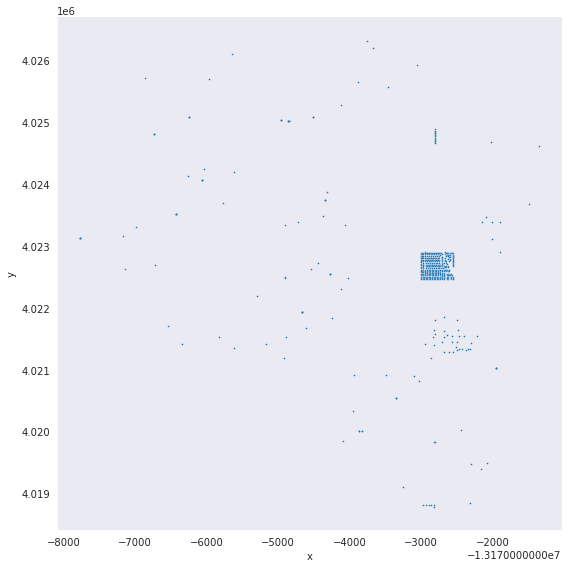

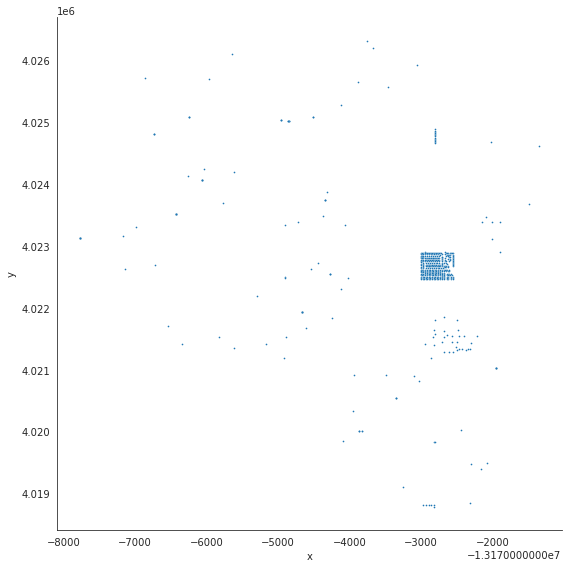

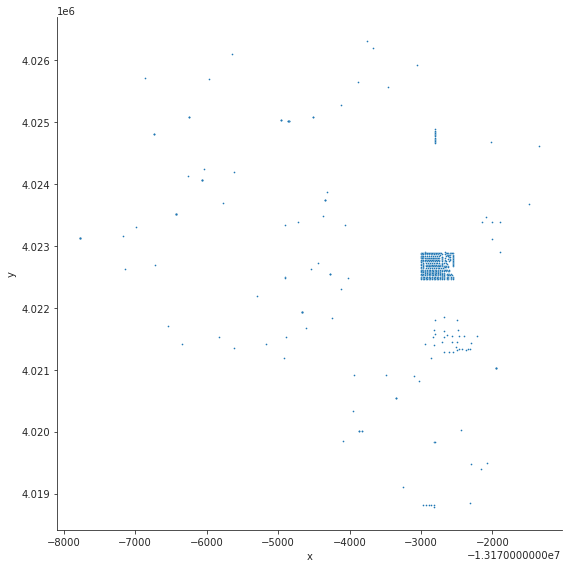

In [37]:
# loop
for style in ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']:
    sns_styles(style = style)

# Choosing Colors

In [38]:
color_list=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

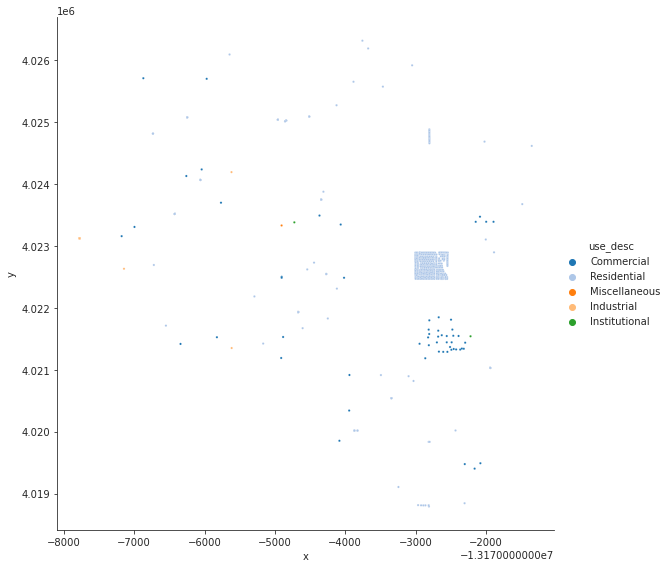

In [39]:
# scatterplot colored by area
sns.relplot(data=gdf10,
            x='x', 
            y='y',
            hue='use_desc',
            palette='tab20',
            s=5,
            height=8)

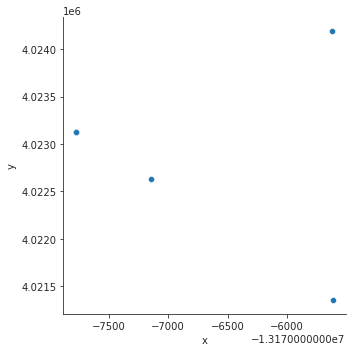

In [40]:
sns.relplot(data=gdf10[gdf10['use_desc']=='Industrial'],
            x='x', 
            y='y')

In [41]:
## Up here, all I did was filter to see what was built in the year 2000

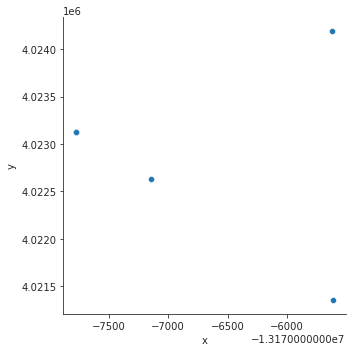

In [42]:
sns.relplot(data=gdf10[gdf10['use_desc']=='Industrial'],
            x='x', 
            y='y')

In [43]:
## Same here but for residential.

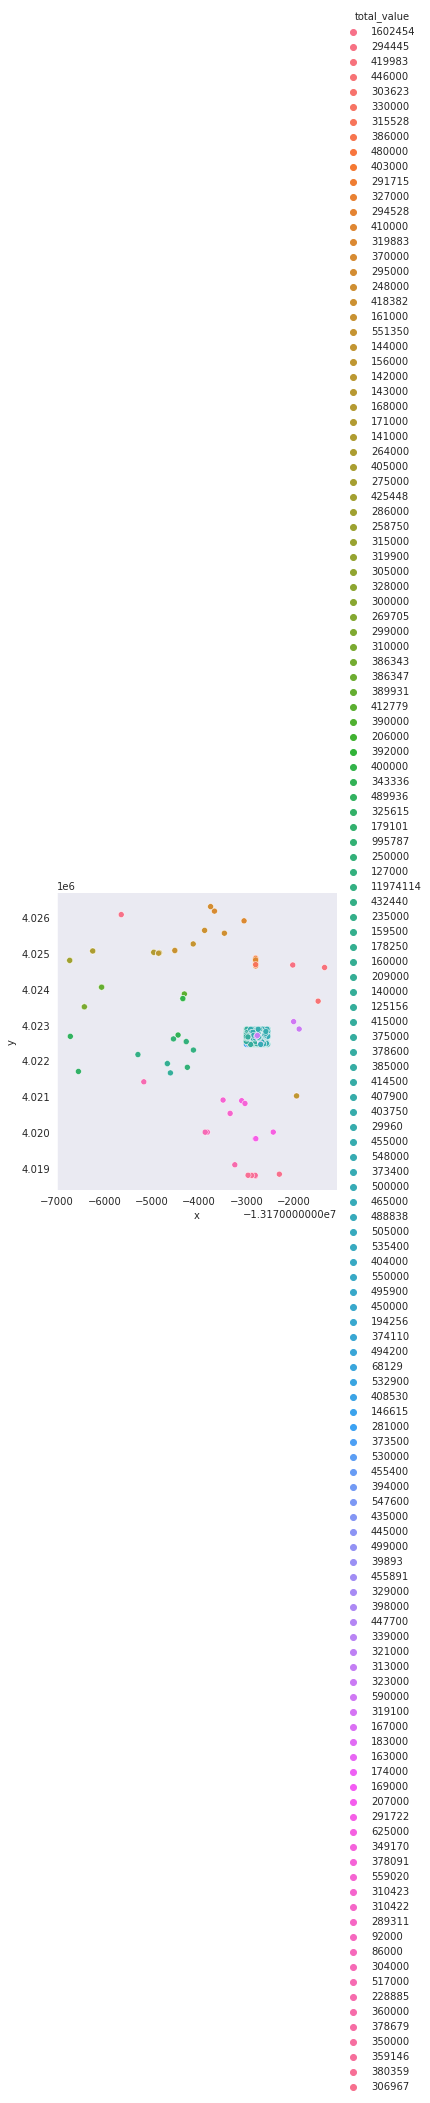

In [124]:
# color by categorical column
sns.relplot(data=gdf10[gdf10['use_desc']=='Residential'],
            x='x', 
            y='y',
            hue='total_value')


#I plaued with the code to see the total value - looks cool, but messy.

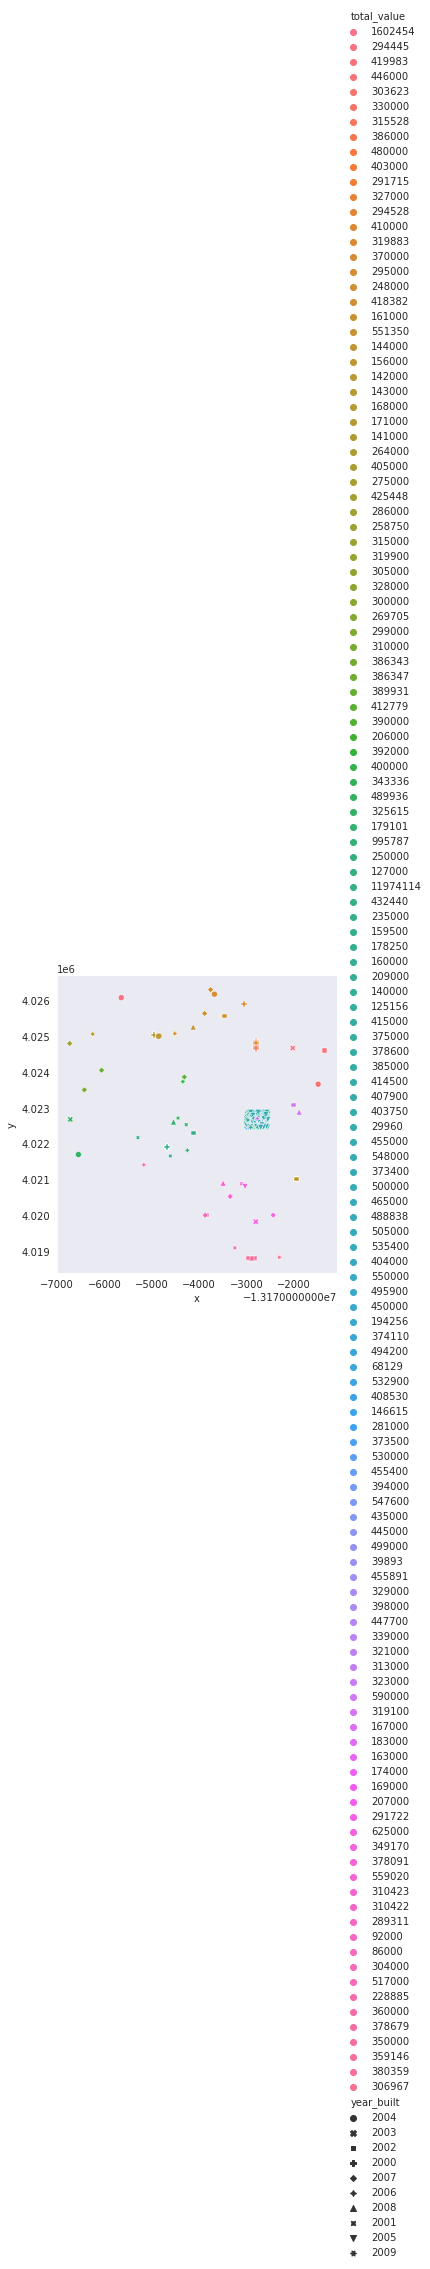

In [128]:
# style markers
sns.relplot(data=gdf10[gdf10['use_desc']=='Residential'],
            x='x', 
            y='y',
            hue='total_value',
            style='year_built')

# Joint Plots 

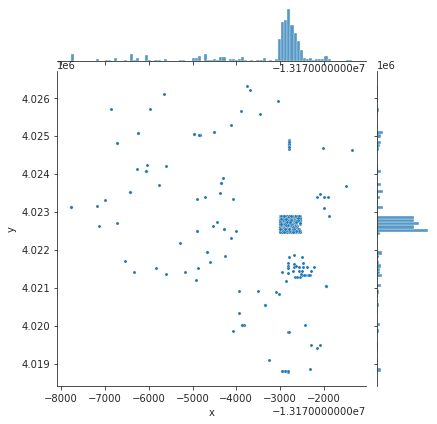

In [45]:
# scatterplot with edges
g = sns.jointplot(data = gdf10,
                  x='x', 
                  y='y',
                  s=10)

# With a Base Map

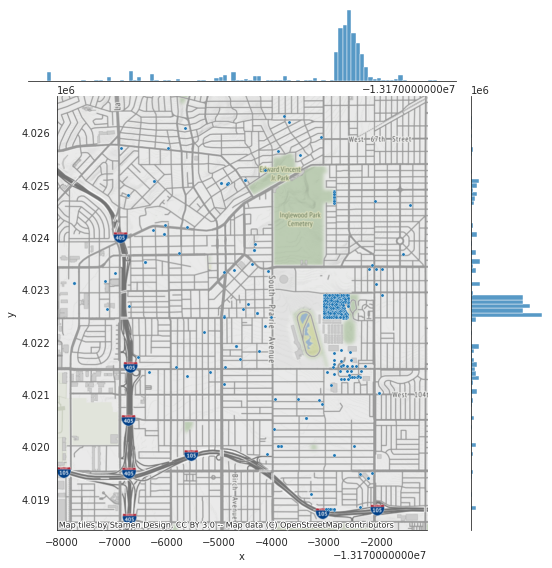

In [46]:
# add a basemap to jointplots
# scatterplot with edges
sns.set_style('white')
g = sns.jointplot(data = gdf10,
                  x='x', 
                  y='y',
                  s=10,
                  height=8 # make the map bigger
                 )

# Clean axes (optional)
# g.ax_joint.set_axis_off()

# add basemap
ctx.add_basemap(g.ax_joint,
                crs='epsg:3857')

# Hex Binning 

(-13178096.69943374,
 -13171029.985191071,
 4018413.7466159626,
 4026691.7615241096)

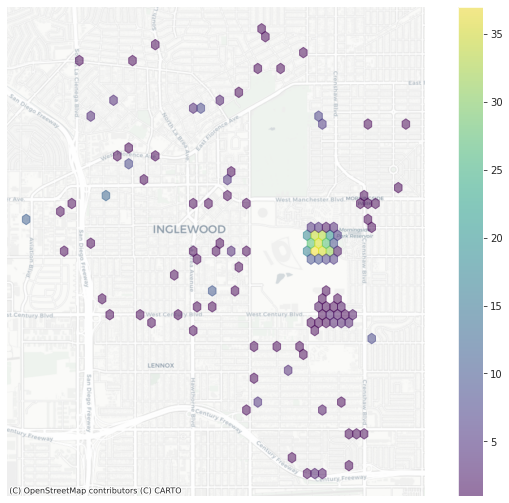

In [129]:
# Set up figure and axis
f, ax = plt.subplots(figsize=(12, 9))

# Generate and add hexbin with 50 hexagons in each 
# dimension, half transparency, ommitting grids with no development,
# and using the viridis colormap
hb = ax.hexbin(
    x = gdf10['x'], 
    y = gdf10['y'],
    gridsize=50, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, # don't show zero
    cmap='viridis'
)

# Add basemap
ctx.add_basemap(
    ax, 
    crs='epsg:3857',
    source=ctx.providers.CartoDB.Positron
)

# Add colorbar
plt.colorbar(hb)

# Remove axes
ax.axis('off')

This hexbinning is really cool, but i'd like to understand what the numbers means exactly. Is it the amount of construction that occurred in that area?

In [48]:
# Now we create a subset of the data
gdf_HBW = gdf10[gdf10.use_desc.isin(['Residential','Commercial','Industrial'])]

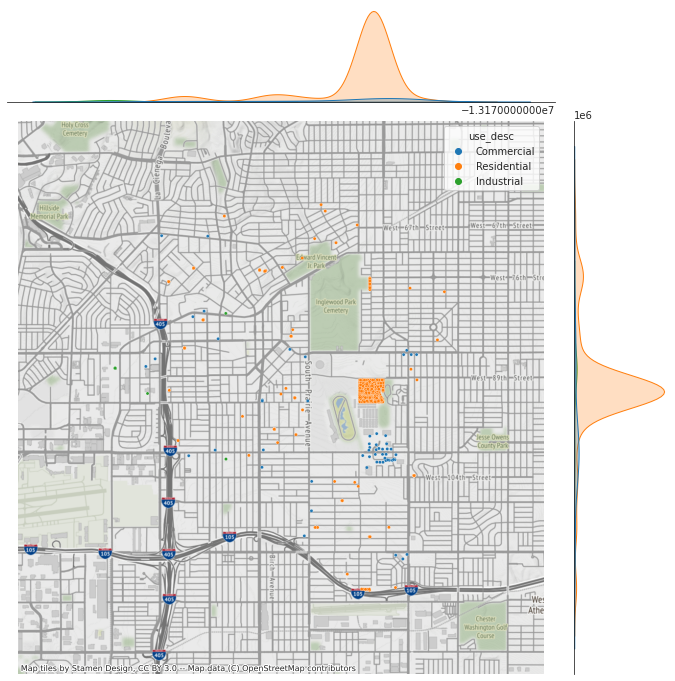

In [49]:
# color code by use building description 
g = sns.jointplot(data = gdf_HBW,
                  x='x', 
                  y='y',
                  hue='use_desc',
                  s=10,
                  height=10 # make the map bigger
                 )

# Clean axes
g.ax_joint.set_axis_off()

# add basemap
ctx.add_basemap(g.ax_joint,
                crs='epsg:3857')



# Centrography

Central Tendency .... we made it happen - but what does it mean?

In [50]:
# compute the mean and median centers
mean_center = centrography.mean_center(gdf10[['x','y']])
med_center = centrography.euclidean_median(gdf10[['x','y']])

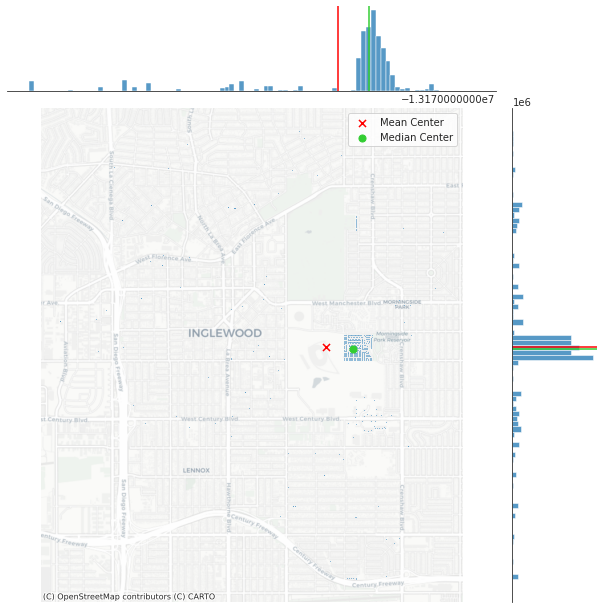

In [51]:
# Generate scatter plot
g = sns.jointplot(
    x='x', y='y', data=gdf10, s=0.75, height=9
)

# Add mean point and marginal lines
# *mean_center is shortcut for x=mean_center[0],y=mean_center[1]
g.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
g.ax_marg_x.axvline(mean_center[0], color='red')
g.ax_marg_y.axhline(mean_center[1], color='red')

# Add median point and marginal lines
g.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
g.ax_marg_x.axvline(med_center[0], color='limegreen')
g.ax_marg_y.axhline(med_center[1], color='limegreen')

# Legend
g.ax_joint.legend()

# Add basemap
ctx.add_basemap(
    g.ax_joint, 
    crs='epsg:3857',
    source=ctx.providers.CartoDB.Positron
)

# Clean axes
g.ax_joint.set_axis_off()

# Display
plt.show()


It appears that the center point of our data for this time frame is located on the SoFi lot... which brought up questions of collusion and insider trading. 

# Dispersion and Orientation

I guess now we are trying to understand how much deviation lies within the centrality of the point in our data where the most development occurred. Or from what I think - is this normal or is there something happening here? a pattern? too much of a coincidence?

In [52]:
major, minor, rotation = centrography.ellipse(gdf10[['x','y']])

In [53]:
mean_center

array([-13173310.46820272,   4022686.21850138])

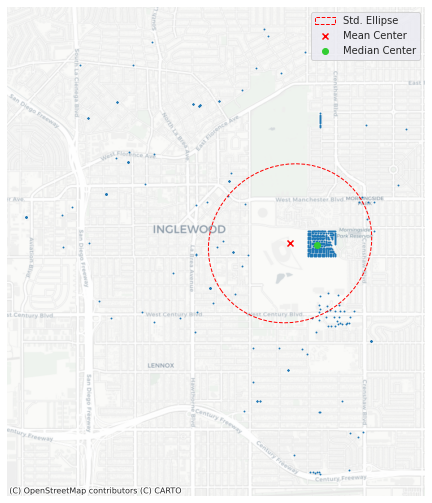

In [54]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(gdf10['x'], gdf10['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax,
                crs='epsg:3857',
                source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

ok, I mean - obviously tons of housing happening there... but why? why would you want to build housing next to such a loud place? We need to look to see what was there before SoFi. We are assuming these are cookie cutter mass produces private gated residencies, because thats a lot of housing! 

# Creating a Function

Ok - lets see just how functional our function is...

In [55]:
def use_ellipse(year_built, use_desc):
    
    # filter the data by building type
    use_desc_filtered = gdf10[(gdf10.use_desc == use_desc) & (gdf10.year_built == year_built)]

    # mean center and median
    mean_center = centrography.mean_center(use_desc_filtered[['x','y']])
    med_center = centrography.euclidean_median(use_desc_filtered[['x','y']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(use_desc_filtered[['x','y']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(9, 9))

    # plot use kind points
    ax.scatter(use_desc_filtered['x'], use_desc_filtered['y'], s=3)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    # add the legend
    ax.legend()

    # no axix
    ax.axis('Off')

    # add a dynamic title
    ax.set_title(year_built + ': ' + str(len(use_desc_filtered)) + ' type of use "' + use_desc + '" (Year 2005)')

    # add a basemap
    ctx.add_basemap(ax,
                    crs='epsg:3857',
                    source=ctx.providers.CartoDB.Positron)
    # Display
    plt.show()

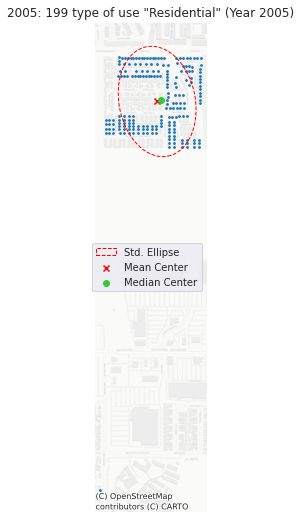

In [56]:
# call the function for a single area and a single use type
use_ellipse(year_built='2005',use_desc='Residential')

So i'm assuming that for the year 2005 - this is the median location of all development occurring. 

In [57]:
# get top 10 values
top10value = gdf10['total_value'].value_counts().head(10).index.tolist()
top10value

['455000',
 '415000',
 '500000',
 '548000',
 '410000',
 '370000',
 '400000',
 '389931',
 '373500',
 '455400']

In [58]:
# get top 3 years built
top3yearsbuilt = gdf10['year_built'].value_counts().head(3).index.tolist()
top3yearsbuilt

['2005', '2006', '2007']

IDK MAN I"M TRYING TO MAKE SENSE OF THIS ALL -

here is where I start losing track of my thoughts so we will just pause and check in with Yoh & co. 

# 2011 -2020 DATA ANALYSIS BEGINS HERE // Explanations End 

Basically here we repeated the same exact process but we did it for the years 2011-2020.
I wont be discussing the process in a step by step basis like I did for above - but just know that we 
did look at the maps that were produced and managed to see some interesting contrasts. 


Our next steps are to try and figure out how to specifically sort the total value per parcel to put them in buckets to 
create cool graphs and also to try and plot them to see if anything cool is happening, which from the initial looks of it 
it kind of looks like there is some exciting stuff going on. Not what I would have expected though. 

In [59]:
# connect to the data portal
client = Socrata("data.lacounty.gov", None)

results = client.get("9trm-uz8i",
                    limit=50000,
                    where="taxratearea_city='INGLEWOOD' AND rollyear=2020 AND yearbuilt between 2011 and 2020")

df20 = pd.DataFrame.from_records(results)

In [60]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   situszip                   54 non-null     object
 1   taxratearea_city           55 non-null     object
 2   ain                        55 non-null     object
 3   rollyear                   55 non-null     object
 4   taxratearea                55 non-null     object
 5   assessorid                 55 non-null     object
 6   propertylocation           54 non-null     object
 7   usetype                    55 non-null     object
 8   usecode                    55 non-null     object
 9   usecodedescchar1           55 non-null     object
 10  usecodedescchar2           55 non-null     object
 11  usecodedescchar3           32 non-null     object
 12  usecodedescchar4           30 non-null     object
 13  totbuildingdatalines       55 non-null     object
 14  yearbuilt   

In [61]:
df20.sample()

situszip taxratearea_city         ain rollyear taxratearea  \
11  90301-1629        INGLEWOOD  4018012018     2020       04569   

      assessorid                            propertylocation usetype usecode  \
11  4018-012-018  601 W MANCHESTER BLVD  INGLEWOOD CA  90301     C/I    1210   

   usecodedescchar1  ...     situscity situszip5           rowid   center_lat  \
11       Commercial  ...  INGLEWOOD CA     90301  20204018012018  33.96200237   

       center_lon                                         location_1  \
11  -118.36642297  {'latitude': '33.96200237', 'longitude': '-118...   

   situsdirection parcelclassification situsunit situsfraction  
11              W                  NaN       NaN           NaN  

[1 rows x 51 columns]

In [62]:
df20.head(5)

situszip taxratearea_city         ain rollyear taxratearea    assessorid  \
0  90302-1027        INGLEWOOD  4001020033     2020       04569  4001-020-033   
1  90302-2503        INGLEWOOD  4014024019     2020       04569  4014-024-019   
2  90301-2208        INGLEWOOD  4020010012     2020       04569  4020-010-012   
3  90301-1810        INGLEWOOD  4021007907     2020       04568  4021-007-907   
4  90301-2277        INGLEWOOD  4020011024     2020       04569  4020-011-024   

                            propertylocation usetype usecode usecodedescchar1  \
0    1740 CENTINELA AVE  INGLEWOOD CA  90302     C/I    2120       Commercial   
1  575 E HYDE PARK BLVD  INGLEWOOD CA  90302     R-I    0300      Residential   
2   310 S INGLEWOOD AVE  INGLEWOOD CA  90301     R-I    0200      Residential   
3       111 N LOCUST ST  INGLEWOOD CA  90301     C/I    6400     Recreational   
4   332 NECTARINE ST, B  INGLEWOOD CA  90301     CND    012C      Residential   

   ...     situscity situszip5           rowid          center_lat  \
0  ...  INGLEWOOD CA     90302  20204001020033  33.977548589999998   
1  ...  INGLEWOOD CA     90302  20204014024019  33.975788010000002   
2  ...  INGLEWOOD CA     90301  20204020010012  33.960114169999997   
3  ...  INGLEWOOD CA     90301  20204021007907  33.963739498844085   
4  ...  INGLEWOOD CA     90301  20204020011024  33.959520529999999   

            center_lon                                         location_1  \
0        -118.36960769  {'latitude': '33.97754859', 'longitude': '-118...   
1        -118.34861689  {'latitude': '33.97578801', 'longitude': '-118...   
2        -118.36138635  {'latitude': '33.96011417', 'longitude': '-118...   
3  -118.35026860983062  {'latitude': '33.963739498844085', 'longitude'...   
4        -118.36101466  {'latitude': '33.95952053', 'longitude': '-118...   

  situsdirection                   parcelclassification situsunit  \
0            NaN                                    NaN       NaN   
1              E                                    NaN       NaN   
2              S                                    NaN       NaN   
3              N  Public (non-taxable government-owned)       NaN   
4            NaN                                    NaN         B   

  situsfraction  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 51 columns]

In [63]:
df20.tail(5)

situszip taxratearea_city         ain rollyear taxratearea  \
50  90301-2005        INGLEWOOD  4126002023     2020       13265   
51       90301        INGLEWOOD  4126017006     2020       13265   
52  90301-3005        INGLEWOOD  4126016026     2020       13265   
53  90301-1520        INGLEWOOD  4127028006     2020       04560   
54  90301-2908        INGLEWOOD  4126020012     2020       13265   

      assessorid                           propertylocation usetype usecode  \
50  4126-002-023    8831 AVIATION BLVD  INGLEWOOD CA  90301     C/I    2700   
51  4126-017-006  9150 S AVIATION BLVD  INGLEWOOD CA  90301     C/I    2600   
52  4126-016-026        725 HINDRY AVE  INGLEWOOD CA  90301     R-I    0550   
53  4127-028-006        234 HINDRY AVE  INGLEWOOD CA  90301     C/I    3312   
54  4126-020-012    9131 AVIATION BLVD  INGLEWOOD CA  90301     C/I    2500   

   usecodedescchar1  ...     situscity situszip5           rowid  \
50       Commercial  ...  INGLEWOOD CA     90301  20204126002023   
51       Commercial  ...  INGLEWOOD CA     90301  20204126017006   
52      Residential  ...  INGLEWOOD CA     90301  20204126016026   
53       Industrial  ...  INGLEWOOD CA     90301  20204127028006   
54       Commercial  ...  INGLEWOOD CA     90301  20204126020012   

            center_lat           center_lon  \
50  33.956455249999998  -118.37786182000001   
51  33.953383700000003        -118.37617111   
52  33.953836369999998        -118.37443487   
53  33.961083979999998        -118.37309112   
54  33.952927649999999  -118.37735584000001   

                                           location_1 situsdirection  \
50  {'latitude': '33.95645525', 'longitude': '-118...            NaN   
51  {'latitude': '33.9533837', 'longitude': '-118....              S   
52  {'latitude': '33.95383637', 'longitude': '-118...            NaN   
53  {'latitude': '33.96108398', 'longitude': '-118...            NaN   
54  {'latitude': '33.95292765', 'longitude': '-118...            NaN   

   parcelclassification situsunit situsfraction  
50                  NaN       NaN           NaN  
51                  NaN       NaN           NaN  
52                  NaN       NaN           NaN  
53                  NaN       NaN           NaN  
54                  NaN       NaN           NaN  

[5 rows x 51 columns]

In [64]:
# convert pandas dataframe to geodataframe
gdf20 = gpd.GeoDataFrame(df20, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(df20.center_lon, df20.center_lat))

In [65]:
# convert lat/lon to floats
df20.center_lon = df20.center_lon.astype('float')
df20.center_lat = df20.center_lat.astype('float')
gdf20.rollyear = gdf20.rollyear.astype('int')

In [66]:
# drop the unmapped rows
gdf20 = gdf20[gdf20.center_lon!=0]


In [67]:
# filter columns

gdf20=gdf20[['taxratearea_city','usetype','usecodedescchar1','yearbuilt',
         'roll_totalvalue','center_lat','center_lon','geometry']]

In [68]:
# rename columns
gdf20.columns = ['city','use_type','use_desc','year_built','total_value',
                 'center_lat','center_lon','geometry']

In [69]:
gdf20.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   city         55 non-null     object  
 1   use_type     55 non-null     object  
 2   use_desc     55 non-null     object  
 3   year_built   55 non-null     object  
 4   total_value  55 non-null     object  
 5   center_lat   55 non-null     float64 
 6   center_lon   55 non-null     float64 
 7   geometry     55 non-null     geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 3.9+ KB


In [70]:
gdf20.sample()

city use_type     use_desc year_built total_value  center_lat  \
25  INGLEWOOD      SFR  Residential       2015      508739   33.976917   

    center_lon                     geometry  
25 -118.337471  POINT (-118.33747 33.97692)

In [71]:
gdf20=gdf20.to_crs('EPSG:3857')

In [72]:
gdf20 = gdf20.dropna()

In [73]:
gdf20 = gdf20[gdf20.total_value!=0]


In [74]:
gdf20.shape

(55, 8)

In [75]:
gdf20.sample(20)

city use_type     use_desc year_built total_value  center_lat  \
44  INGLEWOOD      SFR  Residential       2013      693500   33.933593   
50  INGLEWOOD      C/I   Commercial       2013     1370854   33.956455   
9   INGLEWOOD      SFR  Residential       2014      781135   33.959703   
28  INGLEWOOD      VAC   Commercial       2014     2370948   33.975706   
24  INGLEWOOD      R-I  Residential       2018     1209000   33.958543   
14  INGLEWOOD      R-I  Residential       2017     1103656   33.978400   
16  INGLEWOOD      SFR  Residential       2019      509528   33.980636   
5   INGLEWOOD      C/I   Commercial       2013     2184840   33.970260   
39  INGLEWOOD      R-I  Residential       2013      404433   33.937448   
15  INGLEWOOD      SFR  Residential       2016       27060   33.974018   
10  INGLEWOOD      R-I  Residential       2013    37924912   33.964864   
22  INGLEWOOD      R-I  Residential       2018      763311   33.957273   
4   INGLEWOOD      CND  Residential       2015      431888   33.959521   
25  INGLEWOOD      SFR  Residential       2015      508739   33.976917   
20  INGLEWOOD      C/I   Commercial       2011     3417000   33.960255   
49  INGLEWOOD      SFR  Residential       2011      394088   33.926380   
12  INGLEWOOD      R-I  Residential       2018     1782887   33.955809   
41  INGLEWOOD      R-I  Residential       2011      479338   33.954593   
1   INGLEWOOD      R-I  Residential       2018      880099   33.975788   
21  INGLEWOOD      R-I  Residential       2015      662318   33.959853   

    center_lon                           geometry  
44 -118.340288  POINT (-13173580.599 4019888.690)  
50 -118.377862  POINT (-13177763.299 4022956.528)  
9  -118.363544  POINT (-13176169.449 4023392.369)  
28 -118.352120  POINT (-13174897.729 4025540.411)  
24 -118.365908  POINT (-13176432.610 4023236.732)  
14 -118.342976  POINT (-13173879.802 4025902.108)  
16 -118.346664  POINT (-13174290.330 4026202.161)  
5  -118.344337  POINT (-13174031.314 4024809.426)  
39 -118.341366  POINT (-13173700.645 4020405.930)  
15 -118.354314  POINT (-13175141.942 4025313.868)  
10 -118.365316  POINT (-13176366.749 4024085.083)  
22 -118.366386  POINT (-13176485.850 4023066.268)  
4  -118.361015  POINT (-13175887.882 4023367.917)  
25 -118.337471  POINT (-13173267.055 4025702.941)  
20 -118.319491  POINT (-13171265.473 4023466.525)  
49 -118.335518  POINT (-13173049.590 4018920.870)  
12 -118.354034  POINT (-13175110.852 4022869.838)  
41 -118.361972  POINT (-13175994.424 4022706.615)  
1  -118.348617  POINT (-13174507.768 4025551.411)  
21 -118.362078  POINT (-13176006.256 4023412.484)

<AxesSubplot:>

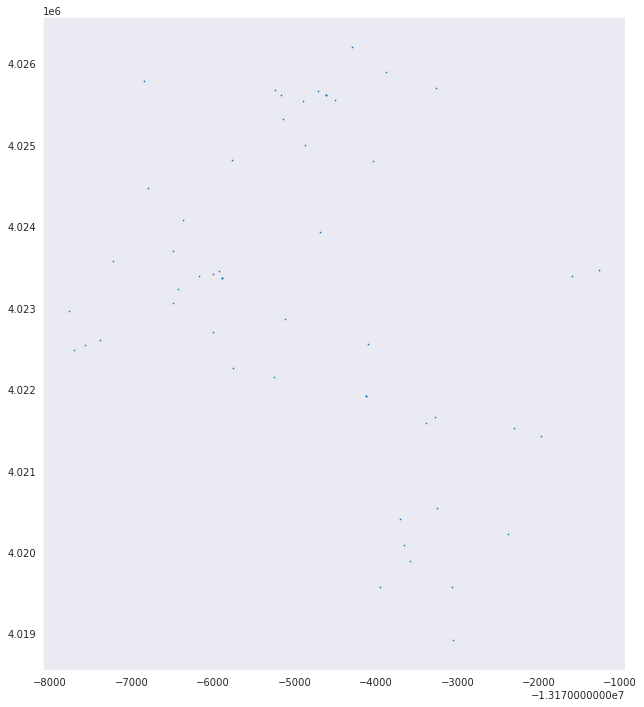

In [76]:
gdf20.plot(figsize=(12,12),
             markersize=0.5)

In [77]:
gdf20.use_desc.value_counts()

Residential     36
Commercial      14
Industrial       3
Recreational     2
Name: use_desc, dtype: int64

In [78]:
gdf20.use_type.value_counts()

C/I    18
R-I    16
SFR    11
CND     9
VAC     1
Name: use_type, dtype: int64

In [79]:
gdf20.year_built.value_counts()

2016    11
2011     9
2017     7
2018     7
2014     7
2015     6
2013     5
2012     2
2019     1
Name: year_built, dtype: int64

In [80]:
gdf20.total_value.value_counts()

431888      3
477542      2
1837922     1
920884      1
345707      1
326806      1
737143      1
45101742    1
350019      1
965917      1
709093      1
404433      1
8489014     1
479338      1
693500      1
396677      1
28908111    1
3921382     1
924029      1
3185254     1
313296      1
394088      1
1370854     1
11680942    1
17600000    1
3409646     1
390561      1
1857843     1
880099      1
2370948     1
730758      1
0           1
2184840     1
870018      1
703579      1
781135      1
37924912    1
2732609     1
1782887     1
1103656     1
27060       1
509528      1
56051550    1
488154      1
3417000     1
662318      1
763311      1
1209000     1
508739      1
597503      1
492495      1
1083534     1
Name: total_value, dtype: int64

In [115]:
## HOW CAN WE BUCKET THE DATA ABOVE TO USE IT TO SORT AND PAINT AN IMAGE OF THE DIFFERENT VALUES OF PROPERTY IN OUR CITY?

In [81]:
# get the top 3 types of building use structures
top_3_uses20 = gdf20.use_desc.value_counts().head(3).index.tolist()
top_3_uses20

['Residential', 'Commercial', 'Industrial']

In [82]:
gdf20[gdf20.use_desc == 'Residential'].head()


city use_type     use_desc year_built total_value  center_lat  \
1  INGLEWOOD      R-I  Residential       2018      880099   33.975788   
2  INGLEWOOD      R-I  Residential       2012      730758   33.960114   
4  INGLEWOOD      CND  Residential       2015      431888   33.959521   
6  INGLEWOOD      CND  Residential       2015      431888   33.959521   
7  INGLEWOOD      R-I  Residential       2018      870018   33.976301   

   center_lon                           geometry  
1 -118.348617  POINT (-13174507.768 4025551.411)  
2 -118.361386  POINT (-13175929.258 4023447.590)  
4 -118.361015  POINT (-13175887.882 4023367.917)  
6 -118.361015  POINT (-13175887.882 4023367.917)  
7 -118.354519  POINT (-13175164.763 4025620.232)

In [83]:
gdf20.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   city         55 non-null     object  
 1   use_type     55 non-null     object  
 2   use_desc     55 non-null     object  
 3   year_built   55 non-null     object  
 4   total_value  55 non-null     object  
 5   center_lat   55 non-null     float64 
 6   center_lon   55 non-null     float64 
 7   geometry     55 non-null     geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 3.9+ KB


In [84]:
gdf20=gdf20.to_crs('EPSG:3857')

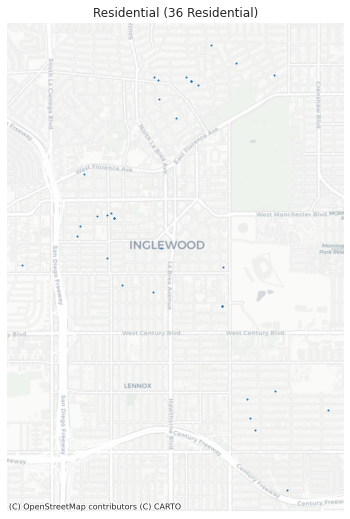

In [116]:
# USE variable
use_desc = 'Residential'

# map
ax = gdf20[gdf20.use_desc == use_desc].plot(figsize=(9,9), markersize=1)

# title (including count)
ax.set_title(use_desc + ' (' + str(gdf20[gdf20.use_desc == use_desc].shape[0]) + ' Residential)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:3857', # surprise! You can change the crs here!
                source=ctx.providers.CartoDB.Positron)


In [86]:
# create a function
def use_desc_by(use_desc='Residential'):
    
    # map
    ax = gdf20[gdf20.use_desc == use_desc].plot(figsize=(9,9), markersize=3)
    
    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title(use_desc + ' (' + str(gdf20[gdf20.use_desc == use_desc].shape[0]) + ' Records)')

    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:3857', # surprise! You can change the crs here!
                    source=ctx.providers.CartoDB.Positron)

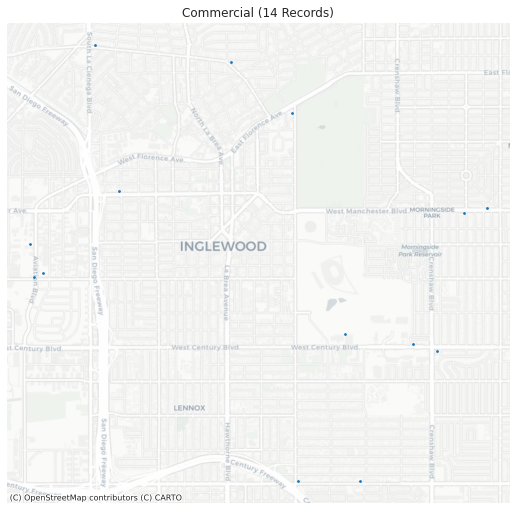

In [87]:
# call the function for a different building type
use_desc_by(use_desc = 'Commercial')

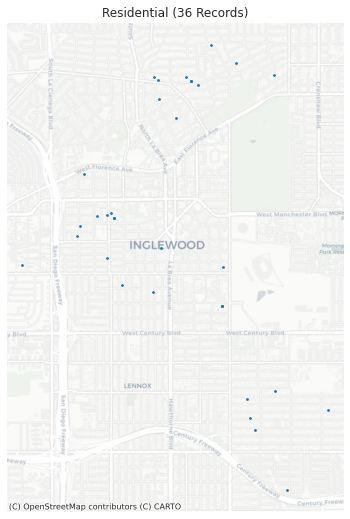

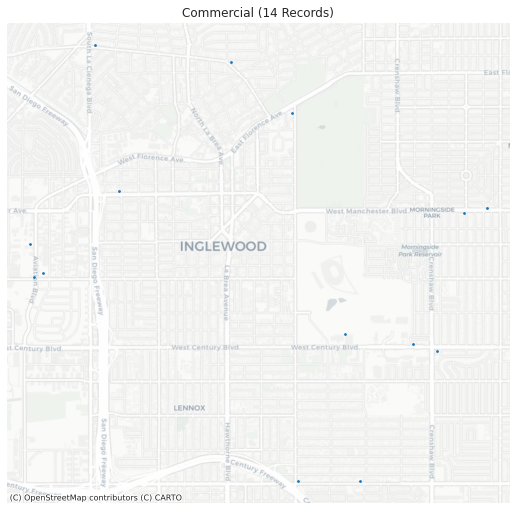

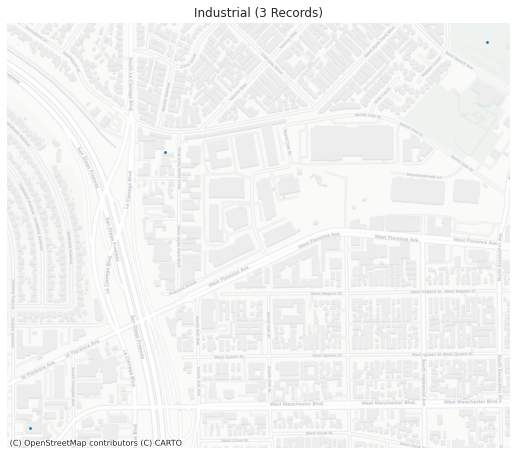

In [88]:
# loop through top 3 buildings uses
for use_desc in top_3_uses:
    use_desc_by(use_desc = use_desc)

In [89]:
# seaborn needs an x and y column so let's extract it from the geometry field
gdf20['x'] = gdf20.geometry.x
gdf20['y'] = gdf20.geometry.y

In [90]:
gdf20.head()

city use_type      use_desc year_built total_value  center_lat  \
0  INGLEWOOD      C/I    Commercial       2017     1837922   33.977549   
1  INGLEWOOD      R-I   Residential       2018      880099   33.975788   
2  INGLEWOOD      R-I   Residential       2012      730758   33.960114   
3  INGLEWOOD      C/I  Recreational       2017           0   33.963739   
4  INGLEWOOD      CND   Residential       2015      431888   33.959521   

   center_lon                           geometry             x             y  
0 -118.369608  POINT (-13176844.453 4025787.749) -1.317684e+07  4.025788e+06  
1 -118.348617  POINT (-13174507.768 4025551.411) -1.317451e+07  4.025551e+06  
2 -118.361386  POINT (-13175929.258 4023447.590) -1.317593e+07  4.023448e+06  
3 -118.350269  POINT (-13174691.637 4023934.165) -1.317469e+07  4.023934e+06  
4 -118.361015  POINT (-13175887.882 4023367.917) -1.317589e+07  4.023368e+06

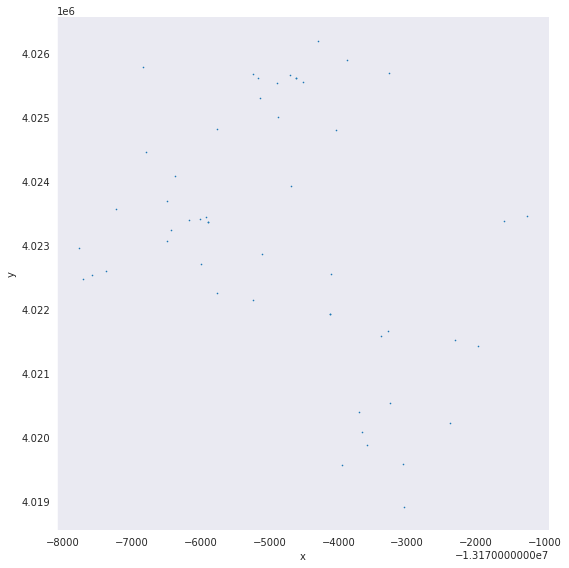

In [91]:
# scatterplot
sns.relplot(data=gdf20,
            x='x', 
            y='y',
            s=3, # size of point
            height=8 # size of plot
           )

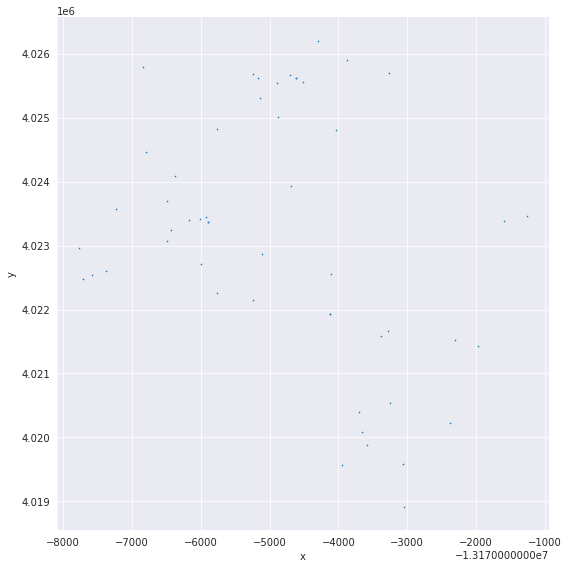

In [93]:
# seaborn comes with themes to make them prettier
sns.set_style('darkgrid')

# scatterplot 
sns.relplot(data=gdf20,
            x='x', 
            y='y',
            s=3,
            height=8)

In [94]:
# function
def sns_styles(style='darkgrid'):
    # seaborn comes with themes to make them prettier
    sns.set_style(style)

    # scatterplot 
    sns.relplot(data=gdf20,
                x='x', 
                y='y',
                s=3,
                height=8)

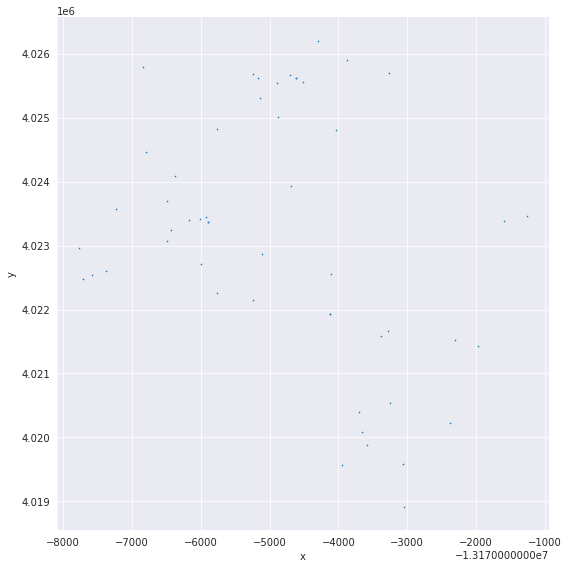

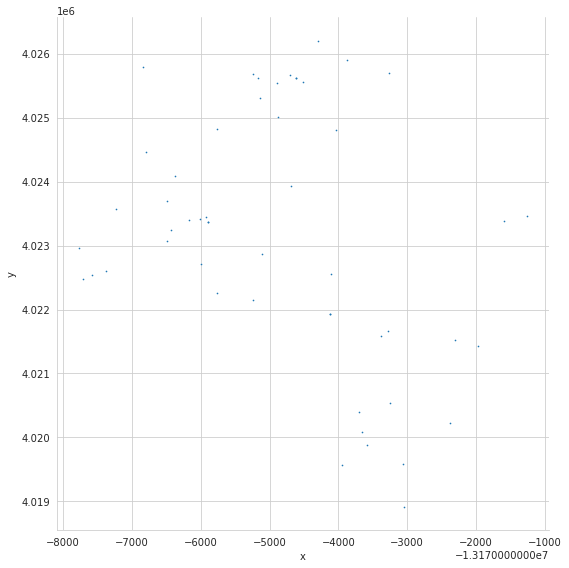

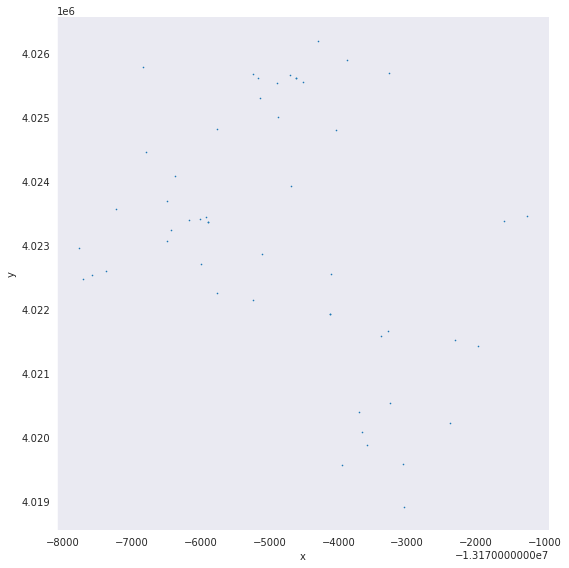

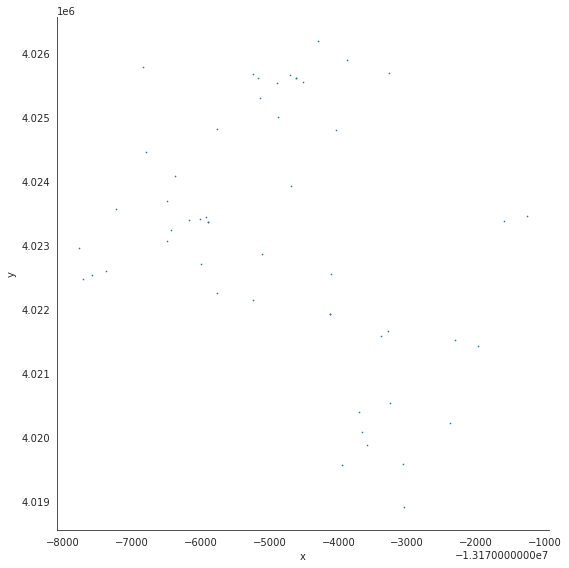

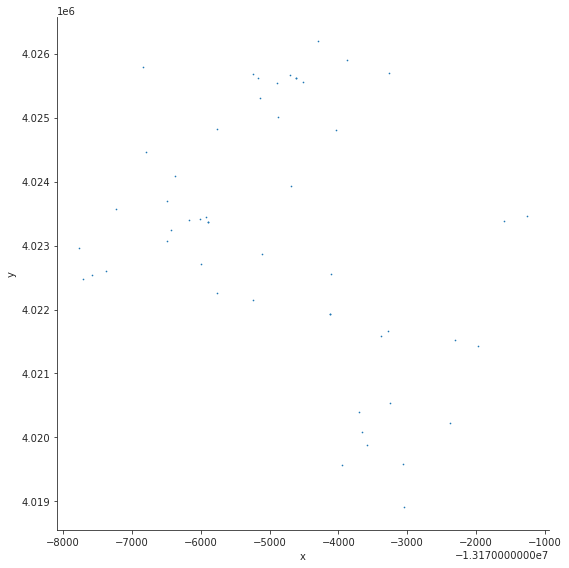

In [95]:
# loop
for style in ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']:
    sns_styles(style = style)

In [96]:
color_list=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

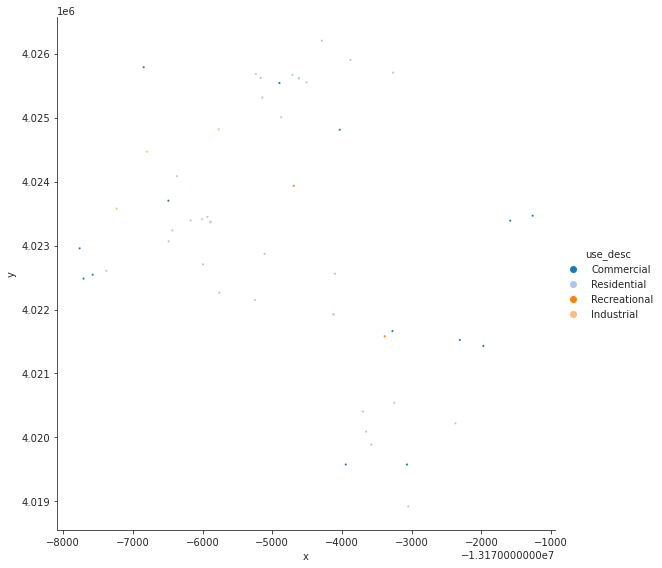

In [97]:
# scatterplot colored by area
sns.relplot(data=gdf20,
            x='x', 
            y='y',
            hue='use_desc',
            palette='tab20',
            s=5,
            height=8)

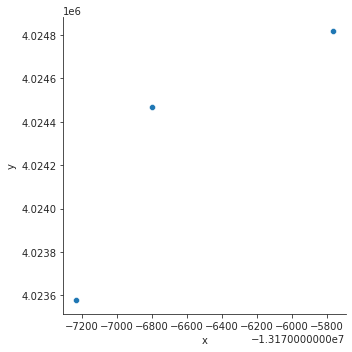

In [98]:
sns.relplot(data=gdf20[gdf20['use_desc']=='Industrial'],
            x='x', 
            y='y')

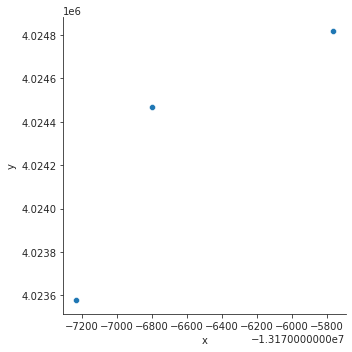

In [99]:
sns.relplot(data=gdf20[gdf20['use_desc']=='Industrial'],
            x='x', 
            y='y')

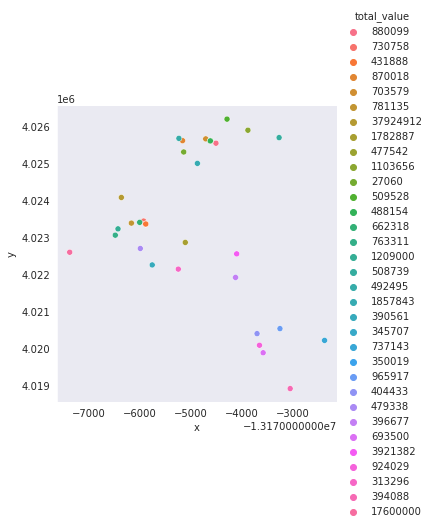

In [130]:
# color by categorical column
sns.relplot(data=gdf20[gdf20['use_desc']=='Residential'],
            x='x', 
            y='y',
            hue='total_value')

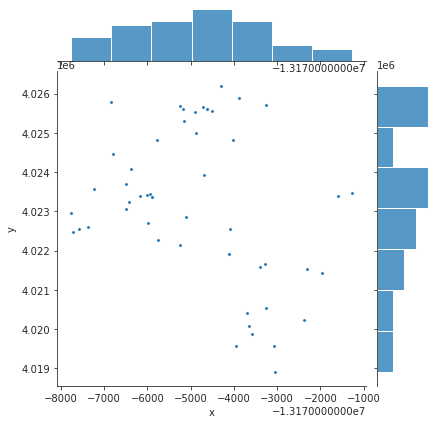

In [101]:
# scatterplot with edges
g = sns.jointplot(data = gdf20,
                  x='x', 
                  y='y',
                  s=10)

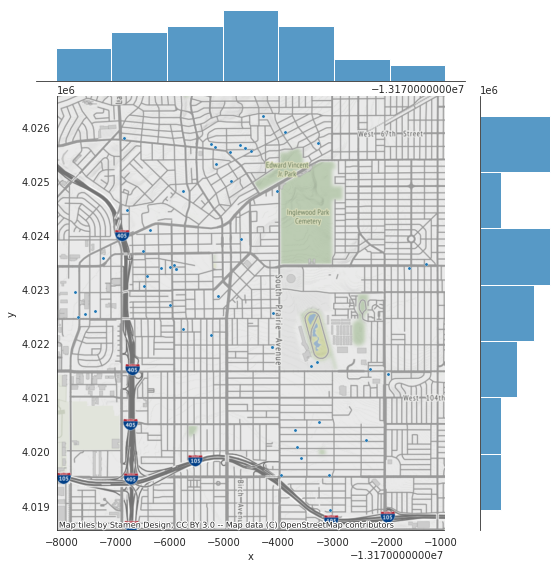

In [102]:
# add a basemap to jointplots
# scatterplot with edges
sns.set_style('white')
g = sns.jointplot(data = gdf20,
                  x='x', 
                  y='y',
                  s=10,
                  height=8 # make the map bigger
                 )

# Clean axes (optional)
# g.ax_joint.set_axis_off()

# add basemap
ctx.add_basemap(g.ax_joint,
                crs='epsg:3857')

(-13178088.190283263,
 -13170940.582170226,
 4018556.805788344,
 4026566.225152278)

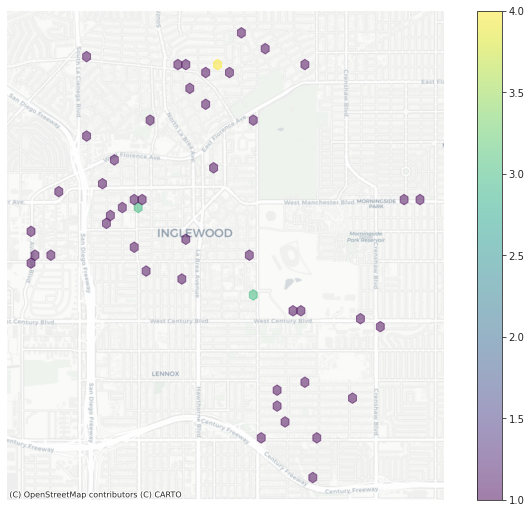

In [103]:
# Set up figure and axis
f, ax = plt.subplots(figsize=(12, 9))

# Generate and add hexbin with 50 hexagons in each 
# dimension, half transparency, ommitting grids with no crime,
# and using the viridis colormap
hb = ax.hexbin(
    x = gdf20['x'], 
    y = gdf20['y'],
    gridsize=50, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, # don't show zero
    cmap='viridis'
)

# Add basemap
ctx.add_basemap(
    ax, 
    crs='epsg:3857',
    source=ctx.providers.CartoDB.Positron
)

# Add colorbar
plt.colorbar(hb)

# Remove axes
ax.axis('off')

In [104]:
gdf_HBW = gdf20[gdf20.use_desc.isin(['Residential','Commercial','Industrial'])]

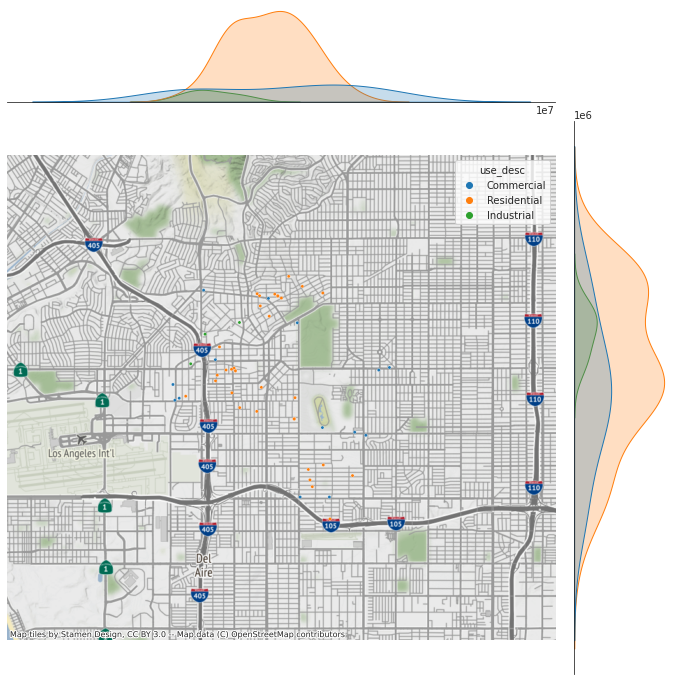

In [105]:
# color code by race
g = sns.jointplot(data = gdf_HBW,
                  x='x', 
                  y='y',
                  hue='use_desc',
                  s=10,
                  height=10 # make the map bigger
                 )

# Clean axes
g.ax_joint.set_axis_off()

# add basemap
ctx.add_basemap(g.ax_joint,
                crs='epsg:3857')

In [106]:
mean_center = centrography.mean_center(gdf20[['x','y']])
med_center = centrography.euclidean_median(gdf20[['x','y']])

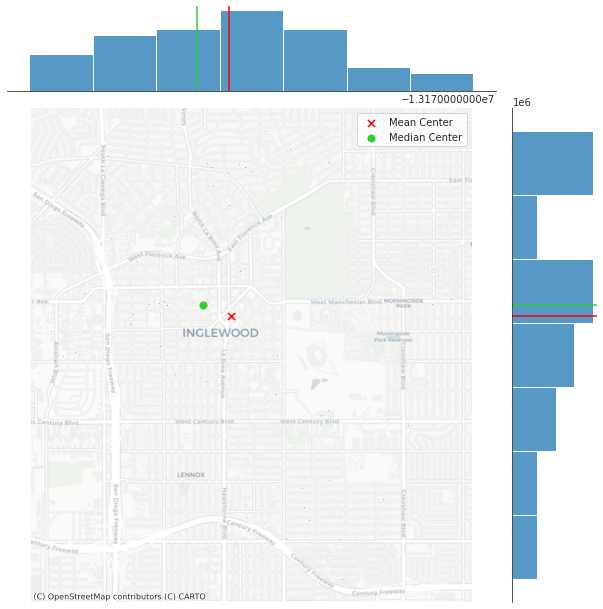

In [107]:
# Generate scatter plot
g = sns.jointplot(
    x='x', y='y', data=gdf20, s=0.75, height=9
)

# Add mean point and marginal lines
# *mean_center is shortcut for x=mean_center[0],y=mean_center[1]
g.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
g.ax_marg_x.axvline(mean_center[0], color='red')
g.ax_marg_y.axhline(mean_center[1], color='red')

# Add median point and marginal lines
g.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
g.ax_marg_x.axvline(med_center[0], color='limegreen')
g.ax_marg_y.axhline(med_center[1], color='limegreen')

# Legend
g.ax_joint.legend()

# Add basemap
ctx.add_basemap(
    g.ax_joint, 
    crs='epsg:3857',
    source=ctx.providers.CartoDB.Positron
)

# Clean axes
g.ax_joint.set_axis_off()

# Display
plt.show()

In [108]:
major, minor, rotation = centrography.ellipse(gdf20[['x','y']])


In [109]:
mean_center


array([-13174839.35637768,   4023201.15183855])

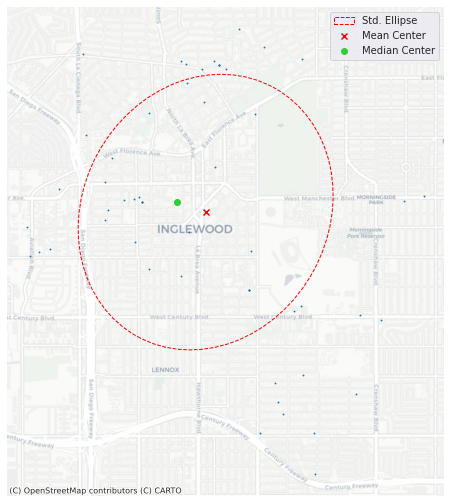

In [110]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(gdf20['x'], gdf20['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax,
                crs='epsg:3857',
                source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

In [111]:
def use_ellipse(year_built, use_desc):
    
    # filter the data by building type
    use_desc_filtered = gdf20[(gdf20.use_desc == use_desc) & (gdf20.year_built == year_built)]

    # mean center and median
    mean_center = centrography.mean_center(use_desc_filtered[['x','y']])
    med_center = centrography.euclidean_median(use_desc_filtered[['x','y']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(use_desc_filtered[['x','y']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(9, 9))

    # plot crime points
    ax.scatter(use_desc_filtered['x'], use_desc_filtered['y'], s=3)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    # add the legend
    ax.legend()

    # no axix
    ax.axis('Off')

    # add a dynamic title
    ax.set_title(year_built + ': ' + str(len(use_desc_filtered)) + ' type of use "' + use_desc + '" (Year 2011)')

    # add a basemap
    ctx.add_basemap(ax,
                    crs='epsg:3857',
                    source=ctx.providers.CartoDB.Positron)
    # Display
    plt.show()

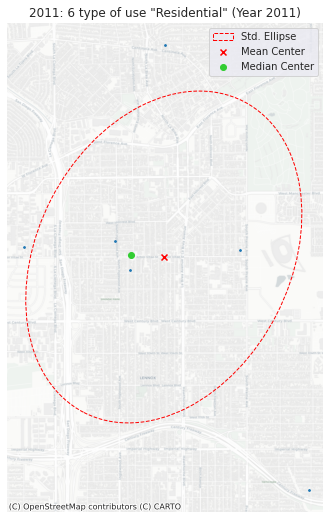

In [112]:
# call the function for a single area and a single crime type
use_ellipse(year_built='2011',use_desc='Residential')

In [113]:
# get top 10 values
top10value20 = gdf20['total_value'].value_counts().head(10).index.tolist()
top10value20

['431888',
 '477542',
 '1837922',
 '920884',
 '345707',
 '326806',
 '737143',
 '45101742',
 '350019',
 '965917']

In [114]:
# get top 3 years built
top3yearsbuilt20 = gdf20['year_built'].value_counts().head(3).index.tolist()
top3yearsbuilt20

['2016', '2011', '2017']